# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [12]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [13]:
import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.12.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [9]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [10]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

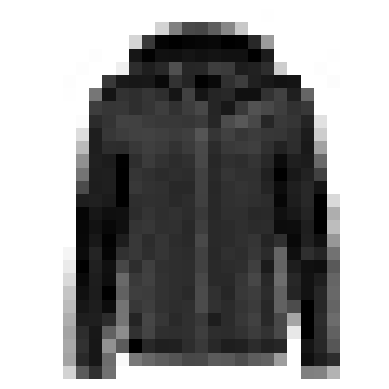

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [15]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

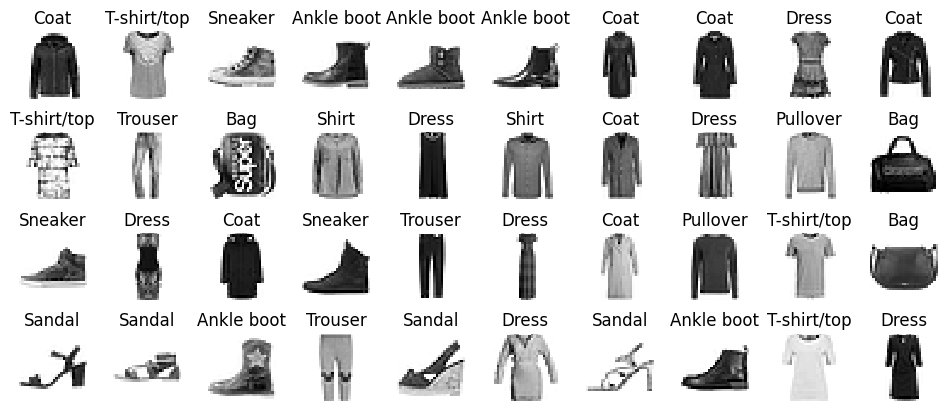

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [26]:
model.get_layer(hidden1.name) is hidden1

True

In [27]:
weights, biases = hidden1.get_weights()

In [28]:
weights

array([[-0.03132954,  0.06568968, -0.06448178, ...,  0.05077344,
        -0.04008884, -0.01167355],
       [ 0.06116092, -0.05266137, -0.04960962, ..., -0.01218378,
         0.07133101,  0.01075637],
       [-0.03209525, -0.04001404, -0.05071476, ..., -0.04482047,
         0.02433048,  0.05549775],
       ...,
       [-0.01168869,  0.05351837,  0.02593698, ...,  0.06544225,
         0.03360829, -0.07115787],
       [ 0.0009651 ,  0.04648927,  0.01309439, ..., -0.0295874 ,
         0.01064489, -0.06066988],
       [ 0.02482306,  0.06164171,  0.03272575, ...,  0.00551947,
        -0.07259536, -0.03930965]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [30]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [31]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [32]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [33]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7157 - accuracy: 0.7638 - val_loss: 0.5024 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4884 - accuracy: 0.8305 - val_loss: 0.4792 - val_accuracy: 0.8344
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4419 - accuracy: 0.8450 - val_loss: 0.4309 - val_accuracy: 0.8462
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4177 - accuracy: 0.8529 - val_loss: 0.3938 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3962 - accuracy: 0.8597 - val_loss: 0.3874 - val_accuracy: 0.8676
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3812 - accuracy: 0.8648 - val_loss: 0.3772 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3659 - accuracy: 0.8710 - val_loss: 0.3751 - val_accuracy:

In [34]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [35]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

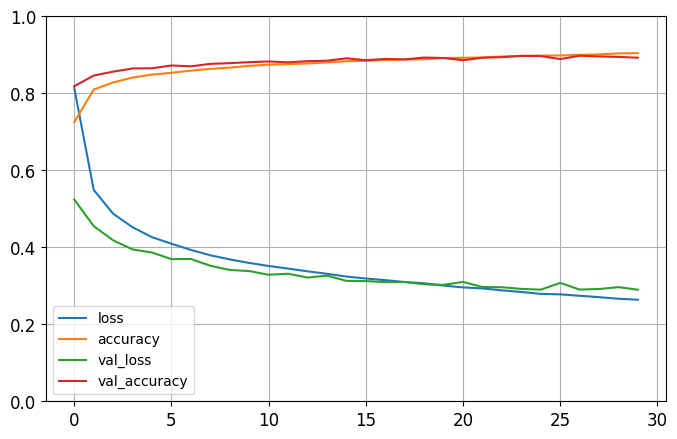

In [16]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8800


[0.32765907049179077, 0.8799999952316284]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 114ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

predict_class() is no longer supported so 

In [40]:
y_pred = np.argmax(model.predict(X_new), axis=1)


1/1 [==============================] - 0s 24ms/step


In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

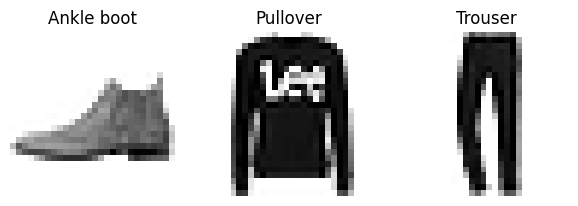

In [43]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2516 - accuracy: 0.9216 - val_loss: 0.5538 - val_accuracy: 0.8906
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2444 - accuracy: 0.9212 - val_loss: 0.6599 - val_accuracy: 0.8808
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2381 - accuracy: 0.9224 - val_loss: 0.6771 - val_accuracy: 0.8842
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2417 - accuracy: 0.9233 - val_loss: 0.6794 - val_accuracy: 0.8796
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2444 - accuracy: 0.9225 - val_loss: 0.8561 - val_accuracy: 0.8790
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2426 - accuracy: 0.9246 - val_loss: 0.6784 - val_accuracy: 0.8916
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2360 - accuracy: 0.9236 - val_loss: 0.6078 - val_ac

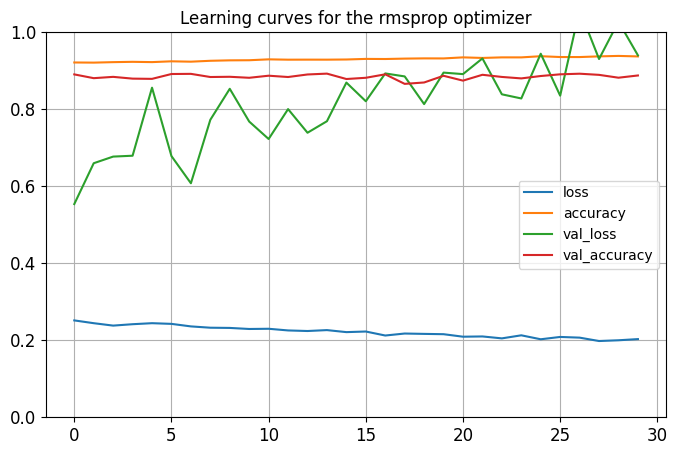

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2599 - accuracy: 0.9251 - val_loss: 0.7580 - val_accuracy: 0.8804
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2197 - accuracy: 0.9291 - val_loss: 0.6559 - val_accuracy: 0.8846
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2157 - accuracy: 0.9322 - val_loss: 0.6996 - val_accuracy: 0.8640
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1878 - accuracy: 0.9365 - val_loss: 0.7773 - val_accuracy: 0.8792
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1860 - accuracy: 0.9354 - val_loss: 0.5610 - val_accuracy: 0.8902
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1737 - accuracy: 0.9394 - val_loss: 0.5148 - val_accuracy: 0.8922
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1694 - accuracy: 0.9398 - val_loss: 0.5935 - val_ac

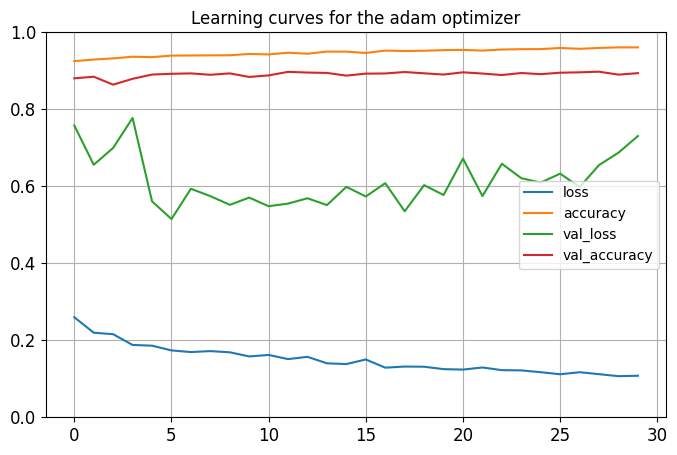

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.0881 - accuracy: 0.9670 - val_loss: 0.7269 - val_accuracy: 0.8938
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0861 - accuracy: 0.9676 - val_loss: 0.7238 - val_accuracy: 0.8932
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0844 - accuracy: 0.9684 - val_loss: 0.7211 - val_accuracy: 0.8946
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0830 - accuracy: 0.9689 - val_loss: 0.7187 - val_accuracy: 0.8952
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0817 - accuracy: 0.9697 - val_loss: 0.7166 - val_accuracy: 0.8956
Epoch 6/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0805 - accuracy: 0.9702 - val_loss: 0.7148 - val_accuracy: 0.8958
Epoch 7/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0795 - accuracy: 0.9706 - val_loss: 0.7133 - val_a

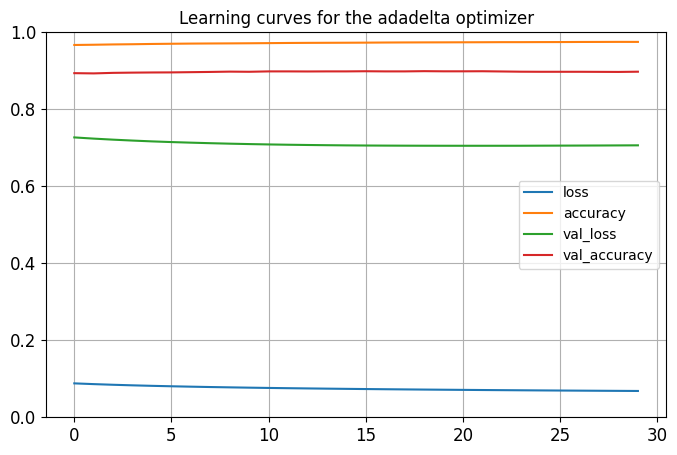

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0668 - accuracy: 0.9754 - val_loss: 0.7038 - val_accuracy: 0.8980
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0641 - accuracy: 0.9764 - val_loss: 0.7062 - val_accuracy: 0.8984
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0624 - accuracy: 0.9770 - val_loss: 0.7045 - val_accuracy: 0.8986
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0612 - accuracy: 0.9777 - val_loss: 0.7064 - val_accuracy: 0.8994
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0602 - accuracy: 0.9779 - val_loss: 0.7085 - val_accuracy: 0.9002
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0594 - accuracy: 0.9783 - val_loss: 0.7103 - val_accuracy: 0.9000
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0588 - accuracy: 0.9784 - val_loss: 0.7107 - val_ac

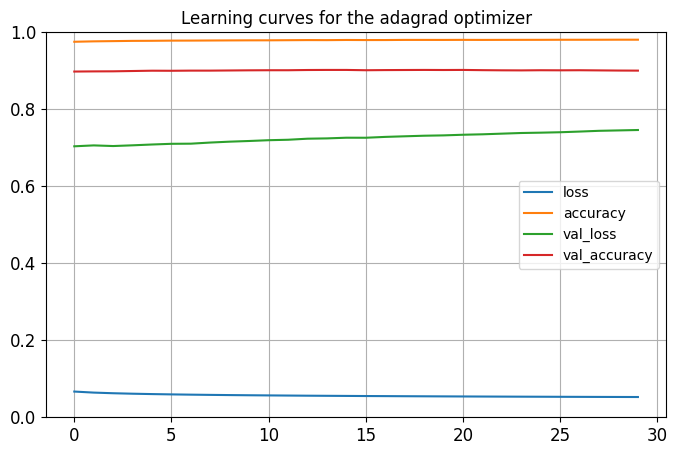

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0581 - accuracy: 0.9784 - val_loss: 0.7828 - val_accuracy: 0.8988
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0547 - accuracy: 0.9791 - val_loss: 0.8073 - val_accuracy: 0.9004
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.8306 - val_accuracy: 0.8984
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0511 - accuracy: 0.9808 - val_loss: 0.8416 - val_accuracy: 0.8974
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0502 - accuracy: 0.9809 - val_loss: 0.8689 - val_accuracy: 0.9008
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0490 - accuracy: 0.9812 - val_loss: 0.8789 - val_accuracy: 0.8986
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0476 - accuracy: 0.9823 - val_loss: 0.8916 - val_ac

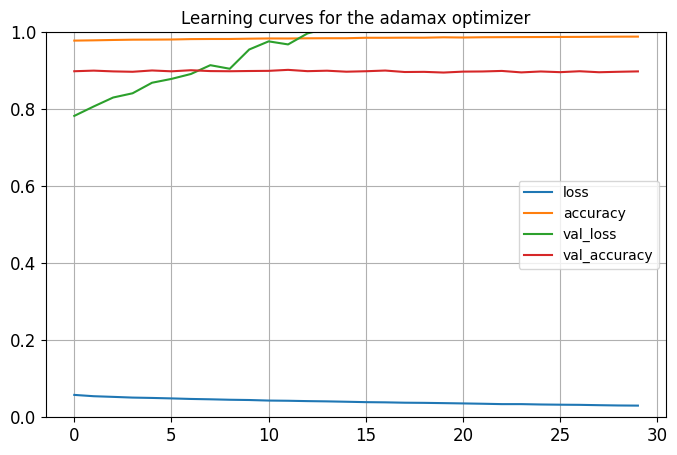

Epoch 1/30
1719/1719 [==============================] - 14s 7ms/step - loss: 0.1044 - accuracy: 0.9639 - val_loss: 0.9835 - val_accuracy: 0.8944
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0963 - accuracy: 0.9656 - val_loss: 0.7865 - val_accuracy: 0.8932
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0923 - accuracy: 0.9674 - val_loss: 0.8119 - val_accuracy: 0.8892
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0935 - accuracy: 0.9655 - val_loss: 0.8063 - val_accuracy: 0.8912
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0887 - accuracy: 0.9674 - val_loss: 0.7784 - val_accuracy: 0.8904
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.0962 - accuracy: 0.9655 - val_loss: 0.8337 - val_accuracy: 0.8866
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0897 - accuracy: 0.9675 - val_loss: 0.7668 - val_ac

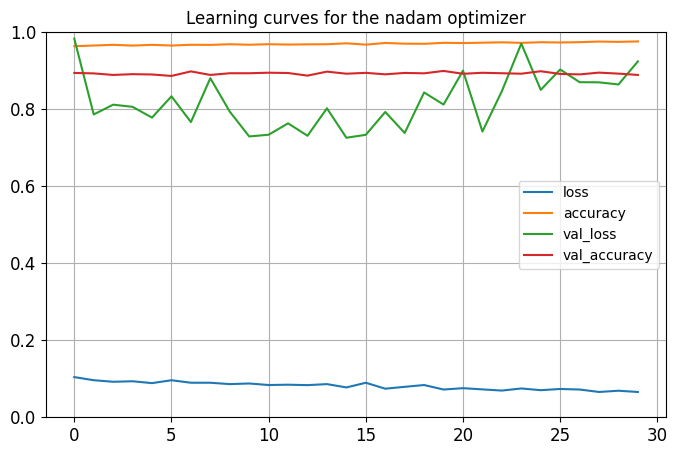

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 2.3012 - accuracy: 0.0997 - val_loss: 2.3025 - val_accuracy: 0.0804
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 2.3021 - accuracy: 0.0993 - val_loss: 2.3016 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 2.2994 - accuracy: 0.1675 - val_loss: 2.2954 - val_accuracy: 0.1862
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 2.2794 - accuracy: 0.1762 - val_loss: 2.2494 - val_accuracy: 0.1420
Epoch 5/30
1719/1719 [==============================] - 13s 8ms/step - loss: 2.1803 - accuracy: 0.1519 - val_loss: 2.0974 - val_accuracy: 0.1626
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 2.0427 - accuracy: 0.1804 - val_loss: 2.0008 - val_accuracy: 0.1862
Epoch 7/30
1719/1719 [==============================] - 13s 8ms/step - loss: 1.9834 - accuracy: 0.1925 - val_loss: 1.9655 - val_ac

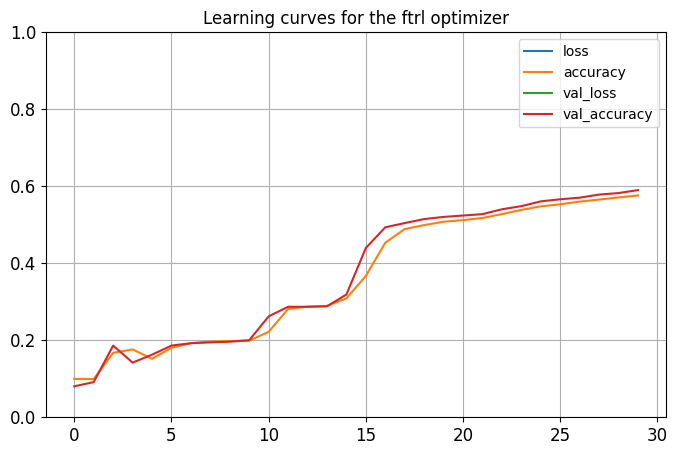

In [45]:
for optimizer in ["rmsprop", "adam", "adadelta", "adagrad", "adamax", "nadam", "ftrl"]:
  model.compile(loss="sparse_categorical_crossentropy",
                optimizer= optimizer ,
                metrics=["accuracy"])
  history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                      validation_data=(X_valid, y_valid))

  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title(f"Learning curves for the {optimizer} optimizer")
  plt.show()

#### 2) Plot Learning curves when using different batch size

Epoch 1/30
3438/3438 [==============================] - 18s 5ms/step - loss: 0.2608 - accuracy: 0.9026 - val_loss: 0.2998 - val_accuracy: 0.8884
Epoch 2/30
3438/3438 [==============================] - 17s 5ms/step - loss: 0.2538 - accuracy: 0.9058 - val_loss: 0.3022 - val_accuracy: 0.8872
Epoch 3/30
3438/3438 [==============================] - 17s 5ms/step - loss: 0.2503 - accuracy: 0.9073 - val_loss: 0.2992 - val_accuracy: 0.8888
Epoch 4/30
3438/3438 [==============================] - 17s 5ms/step - loss: 0.2468 - accuracy: 0.9083 - val_loss: 0.2980 - val_accuracy: 0.8902
Epoch 5/30
3438/3438 [==============================] - 18s 5ms/step - loss: 0.2447 - accuracy: 0.9088 - val_loss: 0.3028 - val_accuracy: 0.8864
Epoch 6/30
3438/3438 [==============================] - 18s 5ms/step - loss: 0.2420 - accuracy: 0.9105 - val_loss: 0.2972 - val_accuracy: 0.8868
Epoch 7/30
3438/3438 [==============================] - 18s 5ms/step - loss: 0.2392 - accuracy: 0.9114 - val_loss: 0.2994 - val_ac

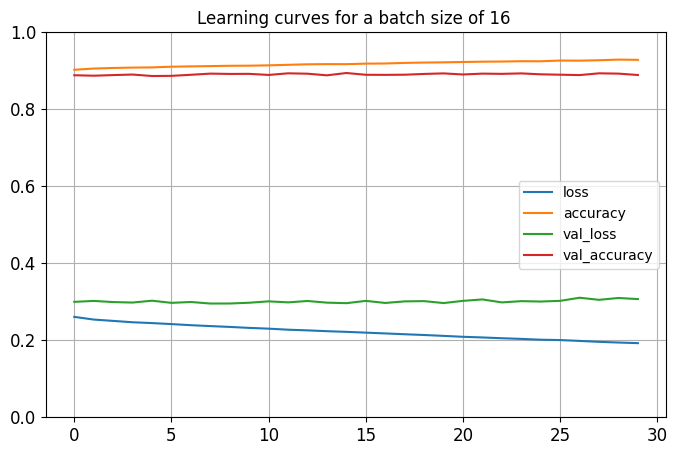

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1838 - accuracy: 0.9330 - val_loss: 0.3017 - val_accuracy: 0.8928
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1825 - accuracy: 0.9334 - val_loss: 0.3047 - val_accuracy: 0.8936
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1815 - accuracy: 0.9336 - val_loss: 0.3059 - val_accuracy: 0.8900
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1805 - accuracy: 0.9343 - val_loss: 0.3026 - val_accuracy: 0.8918
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1790 - accuracy: 0.9346 - val_loss: 0.3050 - val_accuracy: 0.8932
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1780 - accuracy: 0.9349 - val_loss: 0.3041 - val_accuracy: 0.8916
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1770 - accuracy: 0.9355 - val_loss: 0.3081 - val_accuracy:

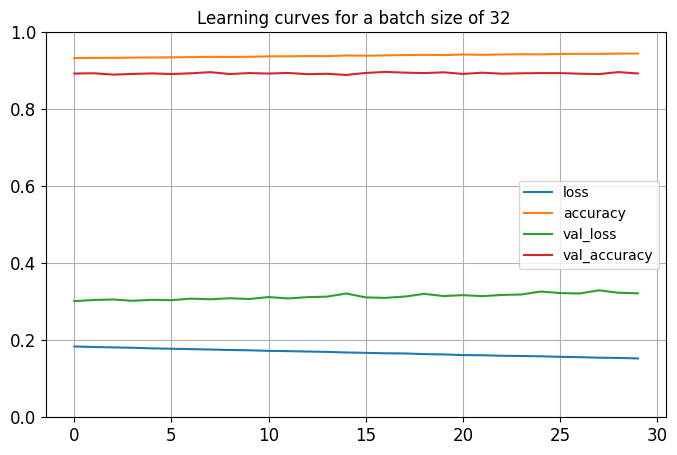

Epoch 1/30
860/860 [==============================] - 5s 5ms/step - loss: 0.1464 - accuracy: 0.9481 - val_loss: 0.3247 - val_accuracy: 0.8930
Epoch 2/30
860/860 [==============================] - 5s 6ms/step - loss: 0.1456 - accuracy: 0.9478 - val_loss: 0.3244 - val_accuracy: 0.8932
Epoch 3/30
860/860 [==============================] - 5s 5ms/step - loss: 0.1449 - accuracy: 0.9488 - val_loss: 0.3260 - val_accuracy: 0.8928
Epoch 4/30
860/860 [==============================] - 5s 5ms/step - loss: 0.1442 - accuracy: 0.9488 - val_loss: 0.3244 - val_accuracy: 0.8964
Epoch 5/30
860/860 [==============================] - 5s 6ms/step - loss: 0.1438 - accuracy: 0.9489 - val_loss: 0.3327 - val_accuracy: 0.8908
Epoch 6/30
860/860 [==============================] - 4s 5ms/step - loss: 0.1432 - accuracy: 0.9497 - val_loss: 0.3323 - val_accuracy: 0.8926
Epoch 7/30
860/860 [==============================] - 5s 6ms/step - loss: 0.1425 - accuracy: 0.9498 - val_loss: 0.3271 - val_accuracy: 0.8938
Epoch 

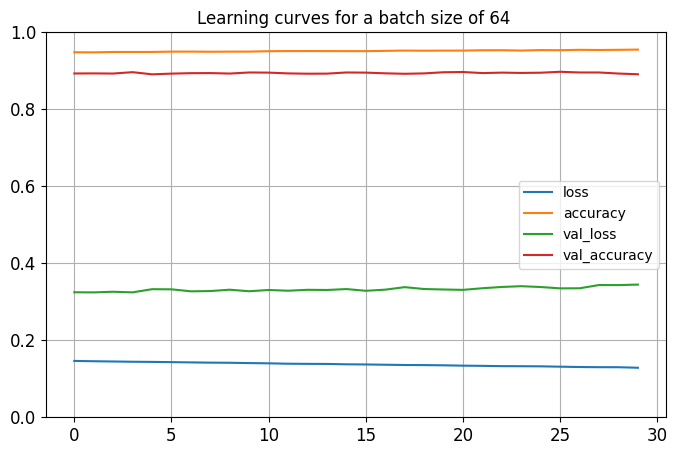

Epoch 1/30
430/430 [==============================] - 4s 9ms/step - loss: 0.1253 - accuracy: 0.9561 - val_loss: 0.3412 - val_accuracy: 0.8946
Epoch 2/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1246 - accuracy: 0.9566 - val_loss: 0.3410 - val_accuracy: 0.8968
Epoch 3/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1244 - accuracy: 0.9571 - val_loss: 0.3420 - val_accuracy: 0.8946
Epoch 4/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1240 - accuracy: 0.9575 - val_loss: 0.3420 - val_accuracy: 0.8948
Epoch 5/30
430/430 [==============================] - 4s 9ms/step - loss: 0.1234 - accuracy: 0.9579 - val_loss: 0.3455 - val_accuracy: 0.8924
Epoch 6/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1233 - accuracy: 0.9575 - val_loss: 0.3433 - val_accuracy: 0.8948
Epoch 7/30
430/430 [==============================] - 3s 7ms/step - loss: 0.1230 - accuracy: 0.9571 - val_loss: 0.3419 - val_accuracy: 0.8950
Epoch 

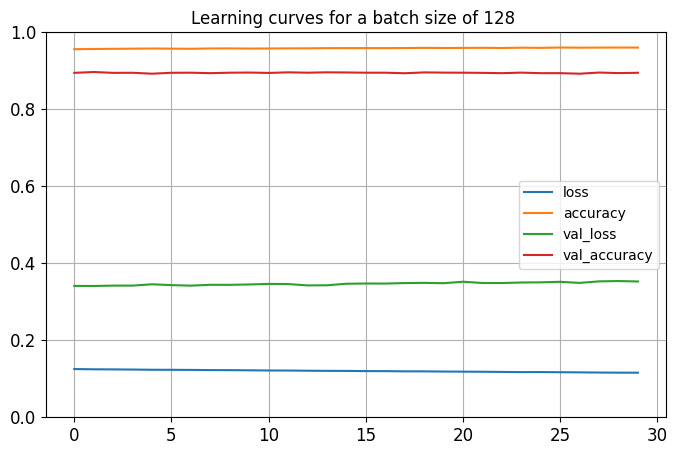

In [47]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd" ,
                metrics=["accuracy"])
for x in [16, 32, 64, 128 ]:
  history = model.fit(X_train, y_train, batch_size=x, epochs=30,
                    validation_data=(X_valid, y_valid))
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title(f"Learning curves for a batch size of {x} ")
  plt.show()

#### 3) Plot Learning curves when using different number of epochs

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1294 - accuracy: 0.9540 - val_loss: 0.3622 - val_accuracy: 0.8934
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1282 - accuracy: 0.9537 - val_loss: 0.3617 - val_accuracy: 0.8924
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9543 - val_loss: 0.3604 - val_accuracy: 0.8906
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1270 - accuracy: 0.9542 - val_loss: 0.3534 - val_accuracy: 0.8914
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1257 - accuracy: 0.9556 - val_loss: 0.3639 - val_accuracy: 0.8930
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1242 - accuracy: 0.9559 - val_loss: 0.3657 - val_accuracy: 0.8910
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1239 - accuracy: 0.9551 - val_loss: 0.3635 - val_accura

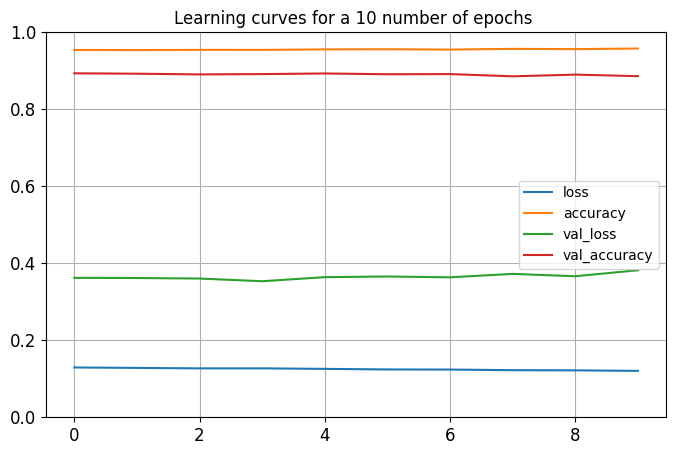

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1193 - accuracy: 0.9569 - val_loss: 0.3641 - val_accuracy: 0.8914
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1185 - accuracy: 0.9578 - val_loss: 0.3666 - val_accuracy: 0.8930
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1179 - accuracy: 0.9581 - val_loss: 0.3687 - val_accuracy: 0.8906
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1171 - accuracy: 0.9586 - val_loss: 0.3795 - val_accuracy: 0.8926
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1164 - accuracy: 0.9584 - val_loss: 0.3710 - val_accuracy: 0.8926
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1154 - accuracy: 0.9595 - val_loss: 0.3659 - val_accuracy: 0.8916
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1141 - accuracy: 0.9598 - val_loss: 0.3807 - val_accuracy:

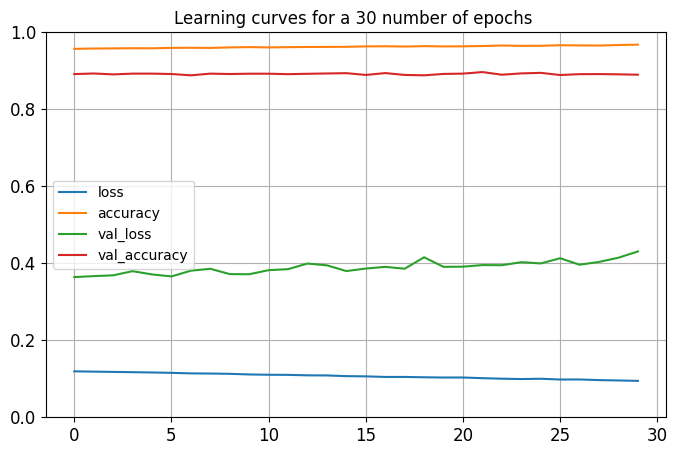

Epoch 1/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0952 - accuracy: 0.9665 - val_loss: 0.4239 - val_accuracy: 0.8890
Epoch 2/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0938 - accuracy: 0.9678 - val_loss: 0.4146 - val_accuracy: 0.8882
Epoch 3/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0934 - accuracy: 0.9681 - val_loss: 0.3994 - val_accuracy: 0.8918
Epoch 4/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0920 - accuracy: 0.9684 - val_loss: 0.4117 - val_accuracy: 0.8922
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0916 - accuracy: 0.9685 - val_loss: 0.4179 - val_accuracy: 0.8900
Epoch 6/50
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0907 - accuracy: 0.9688 - val_loss: 0.4191 - val_accuracy: 0.8900
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0902 - accuracy: 0.9686 - val_loss: 0.4205 - val_accuracy:

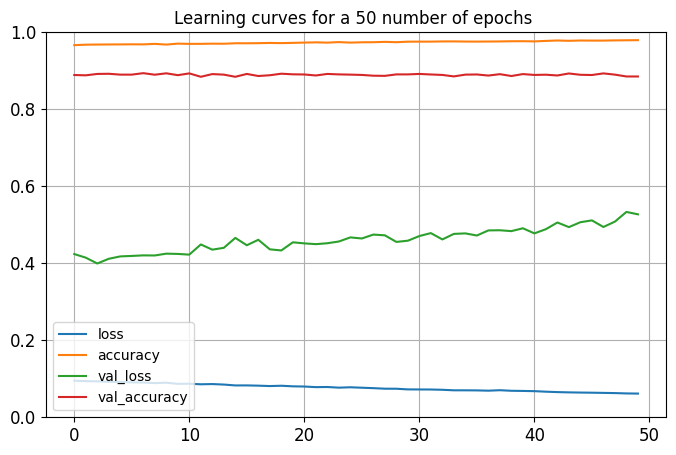

Epoch 1/80
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0606 - accuracy: 0.9799 - val_loss: 0.5160 - val_accuracy: 0.8898
Epoch 2/80
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0608 - accuracy: 0.9793 - val_loss: 0.5106 - val_accuracy: 0.8880
Epoch 3/80
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.5147 - val_accuracy: 0.8892
Epoch 4/80
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0588 - accuracy: 0.9805 - val_loss: 0.5136 - val_accuracy: 0.8888
Epoch 5/80
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0587 - accuracy: 0.9813 - val_loss: 0.5473 - val_accuracy: 0.8852
Epoch 6/80
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0578 - accuracy: 0.9809 - val_loss: 0.5267 - val_accuracy: 0.8870
Epoch 7/80
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0574 - accuracy: 0.9816 - val_loss: 0.5237 - val_accuracy:

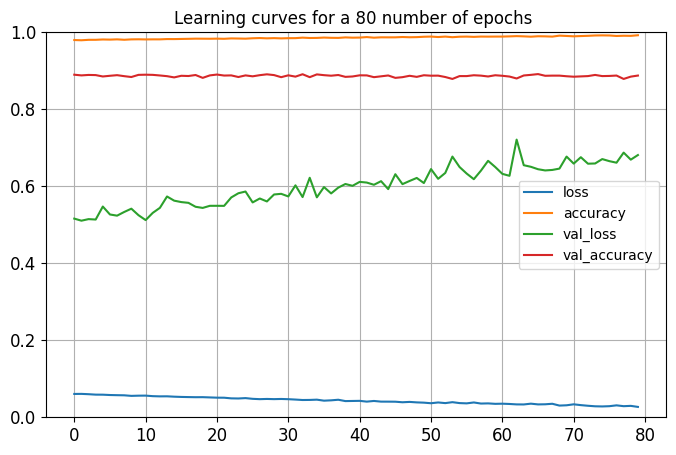

In [48]:
for x in [10, 30, 50, 80 ]:
  history = model.fit(X_train, y_train, batch_size=32, epochs=x,
                    validation_data=(X_valid, y_valid))
  pd.DataFrame(history.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.title(f"Learning curves for a {x} number of epochs ")
  plt.show()

#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

In [9]:
import pandas as pd
from keras.layers import Dropout
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-tr

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd" ,
                metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title(f"Learning curves for a {x} number of epochs ")
plt.show()

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.8135 - accuracy: 0.7251 - val_loss: 0.5237 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5491 - accuracy: 0.8096 - val_loss: 0.4550 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4872 - accuracy: 0.8282 - val_loss: 0.4180 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4519 - accuracy: 0.8408 - val_loss: 0.3944 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4262 - accuracy: 0.8485 - val_loss: 0.3864 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4092 - accuracy: 0.8532 - val_loss: 0.3692 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3932 - accuracy: 0.8589 - val_loss: 0.3695 - val_ac

#### 5) Use Batch Normalisation

In [17]:
from keras.layers import Dropout, BatchNormalization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 300)               90300     
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                      

Epoch 1/30
1719/1719 [==============================] - 23s 12ms/step - loss: 0.2459 - accuracy: 0.9074 - val_loss: 0.2882 - val_accuracy: 0.8990
Epoch 2/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2385 - accuracy: 0.9104 - val_loss: 0.2770 - val_accuracy: 0.9008
Epoch 3/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2342 - accuracy: 0.9122 - val_loss: 0.2781 - val_accuracy: 0.9010
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2322 - accuracy: 0.9126 - val_loss: 0.2879 - val_accuracy: 0.8982
Epoch 5/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2274 - accuracy: 0.9140 - val_loss: 0.2906 - val_accuracy: 0.8976
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2294 - accuracy: 0.9138 - val_loss: 0.2875 - val_accuracy: 0.9004
Epoch 7/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2244 - accuracy: 0.9159 - val_loss: 0.3029 - val_a

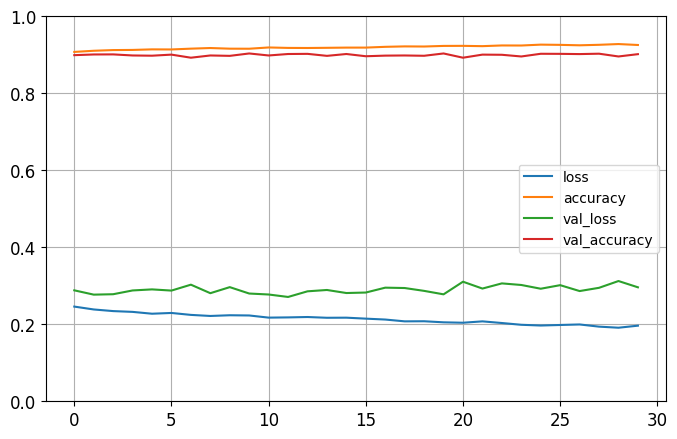

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd" ,
                metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


#### 6) repeat with more layers

In [21]:
from keras.layers import Dropout, BatchNormalization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.BatchNormalization()) 
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(10, activation="softmax"))

Epoch 1/60
1719/1719 [==============================] - 21s 11ms/step - loss: 0.2787 - accuracy: 0.8966 - val_loss: 0.2777 - val_accuracy: 0.8966
Epoch 2/60
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2772 - accuracy: 0.8980 - val_loss: 0.2767 - val_accuracy: 0.8976
Epoch 3/60
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2745 - accuracy: 0.8972 - val_loss: 0.2802 - val_accuracy: 0.8984
Epoch 4/60
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2721 - accuracy: 0.8995 - val_loss: 0.2827 - val_accuracy: 0.9010
Epoch 5/60
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2694 - accuracy: 0.9010 - val_loss: 0.2789 - val_accuracy: 0.8988
Epoch 6/60
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2670 - accuracy: 0.9004 - val_loss: 0.2865 - val_accuracy: 0.8974
Epoch 7/60
1719/1719 [==============================] - 18s 10ms/step - loss: 0.2627 - accuracy: 0.9014 - val_loss: 0.2812 -

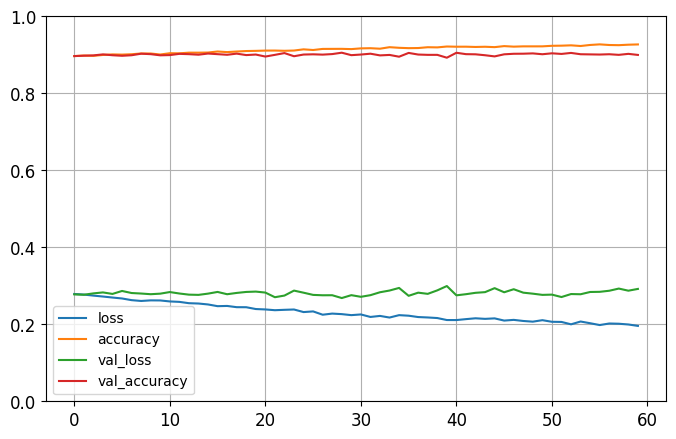

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer= "sgd" ,
                metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=32, epochs=60,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()